This is a file where we conduct the analysis of the improvement, our main result. We go through example by example, so this is the last one we did

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Data/activities.csv')
# print(df.head())
#get the useful metrics
df = df[['Activity Date', 'Activity Type', 'Elapsed Time', 'Distance', 'Average Heart Rate', 'Max Heart Rate', 'Moving Time', 'Average Speed', 'Elevation Gain', 'Average Grade', 'Filename']]

#get only one type of activity
df_runs = df[df['Activity Type'] == 'Run']

#data after Jan 1, 2023 to not skew the graphs
df_runs = df_runs[df_runs['Activity Date'] >= '2023-01-01']

df_runs.head()

,Activity Date,Activity Type,Elapsed Time,Distance,Average Heart Rate,Max Heart Rate,Moving Time,Average Speed,Elevation Gain,Average Grade,Filename
0,"Aug 19, 2022, 12:39:19 PM",Run,373,0.96,NaN,NaN,373.0,2.589357,9.457674,-0.279552,activities/7664030898.gpx
3,"Nov 10, 2023, 9:01:09 PM",Run,2205,5.36,NaN,NaN,1959.0,2.736100,17.831402,-0.158581,activities/10195845861.gpx
4,"Nov 13, 2023, 10:07:14 PM",Run,1099,3.24,NaN,NaN,1099.0,2.954823,11.702381,-0.246355,activities/10213672242.gpx
5,"Nov 17, 2023, 9:28:46 PM",Run,1020,2.61,NaN,NaN,846.0,3.087175,8.268750,0.065090,activities/10236119203.gpx
7,"Nov 28, 2023, 9:50:45 PM",Run,1116,3.22,NaN,NaN,1116.0,2.893100,14.260119,-0.170347,activities/10297798873.gpx


In [4]:
def plot_func(df_runs):
    #major plot to compare the main metrics we used
    df_runs['Activity Date'] = pd.to_datetime(df_runs['Activity Date'])
    df_runs['Distance'] = pd.to_numeric(df_runs['Distance'], errors='coerce')
    df_runs['Average Speed'] = pd.to_numeric(df_runs['Average Speed'], errors='coerce')
    df_runs['Average Heart Rate'] = pd.to_numeric(df_runs['Average Heart Rate'], errors='coerce')
    df_runs['Elevation Gain'] = pd.to_numeric(df_runs['Elevation Gain'], errors='coerce')

    #fix date formatting
    dates_num = mdates.date2num(df_runs['Activity Date'])

    #plot
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
    date_formatter = mdates.DateFormatter('%b %Y')

    #speed
    axes[0,0].scatter(df_runs['Activity Date'], df_runs['Average Speed'], alpha=0.6, color='tab:blue', label='Avg Speed')
    mask_speed = ~df_runs['Average Speed'].isna()
    z_speed = np.polyfit(dates_num[mask_speed], df_runs['Average Speed'][mask_speed], 1)
    p_speed = np.poly1d(z_speed)
    axes[0,0].plot(df_runs['Activity Date'], p_speed(dates_num), color='black', linestyle='--', label='Trend')
    axes[0,0].set_title('Average Speed')
    axes[0,0].set_ylabel('Speed (m/s)')
    axes[0,0].xaxis.set_major_formatter(date_formatter)
    axes[0,0].legend()

    #distance
    axes[0,1].scatter(df_runs['Activity Date'], df_runs['Distance'], alpha=0.6, color='tab:orange', label='Distance')
    mask_dist = ~df_runs['Distance'].isna()
    z_dist = np.polyfit(dates_num[mask_dist], df_runs['Distance'][mask_dist], 1)
    p_dist = np.poly1d(z_dist)
    axes[0,1].plot(df_runs['Activity Date'], p_dist(dates_num), color='black', linestyle='--', label='Trend')
    axes[0,1].set_title('Distance')
    axes[0,1].set_ylabel('Distance (km)')
    axes[0,1].xaxis.set_major_formatter(date_formatter)
    axes[0,1].legend()

    #heart rate
    axes[1,0].scatter(df_runs['Activity Date'], df_runs['Average Heart Rate'], alpha=0.6, color='tab:red', label='Avg HR')
    mask_hr = ~df_runs['Average Heart Rate'].isna()
    if mask_hr.any(): #filter out the case where stuff is missing or causing issues so it's just blank and not error
        z_hr = np.polyfit(dates_num[mask_hr], df_runs['Average Heart Rate'][mask_hr], 1)
        p_hr = np.poly1d(z_hr)
        axes[1,0].plot(df_runs['Activity Date'], p_hr(dates_num), color='black', linestyle='--', label='Trend')
        axes[1,0].set_title('Heart Rate (When Available)')
        axes[1,0].set_ylabel('Avg HR (bpm)')
        axes[1,0].xaxis.set_major_formatter(date_formatter)
        axes[1,0].legend()

    #elevation
    axes[1, 1].scatter(df_runs['Activity Date'], df_runs['Elevation Gain'], alpha=0.6, color='tab:green', label='Elevation Gain')
    mask_elev = ~df_runs['Elevation Gain'].isna()
    z_elev = np.polyfit(dates_num[mask_elev], df_runs['Elevation Gain'][mask_elev], 1)
    p_elev = np.poly1d(z_elev)
    axes[1,1].plot(df_runs['Activity Date'], p_elev(dates_num), color='black', linestyle='--', label='Trend')
    axes[1,1].set_title('Elevation Gain')
    axes[1,1].set_ylabel('Elevation Gain (m)')
    axes[1,1].xaxis.set_major_formatter(date_formatter)
    axes[1,1].legend()
    
    for ax in axes.flatten():
        plt.setp(ax.get_xticklabels(), rotation=45) #fix ticks
    
    plt.tight_layout()
    plt.show()

We made an extra plot improvement, which just is a linear combination of a few possible metrics. This wasn't very useful, and we didn't get results from it, so we dropped it to save space in the paper. We keep it in the code, but it's rather uninteresting

In [10]:

from sklearn.preprocessing import MinMaxScaler

def plot_improvement(df_runs):
    df_runs['Activity Date'] = pd.to_datetime(df_runs['Activity Date'])
    df_runs['Distance'] = pd.to_numeric(df_runs['Distance'], errors='coerce')
    df_runs['Average Speed'] = pd.to_numeric(df_runs['Average Speed'], errors='coerce')
    df_runs['Elevation Gain'] = pd.to_numeric(df_runs['Elevation Gain'], errors='coerce')
    
    df_plot = df_runs[['Activity Date', 'Distance', 'Average Speed', 'Elevation Gain']].dropna() #were a few issues with nans
    
    # scale so linear combo is reasonable
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(df_plot[['Average Speed', 'Distance', 'Elevation Gain']])
    df_scaled = pd.DataFrame(scaled_values, columns=['Speed_scaled', 'Distance_scaled', 'Elevation_scaled'])
    df_plot = df_plot.reset_index(drop=True).join(df_scaled)

    #linear combo
    df_plot['Combined'] = (
        df_plot['Speed_scaled'] * 0.55 +
        df_plot['Distance_scaled'] * 0.4 +
        df_plot['Elevation_scaled'] * 0.05
    )

    #plot
    fig, axes = plt.subplots(1, 1, figsize=(10, 6))
    date_formatter = mdates.DateFormatter('%Y-%m-%d')
    dates_num = mdates.date2num(df_plot['Activity Date'])

    axes.scatter(df_plot['Activity Date'], df_plot['Combined'], alpha=0.6, color='tab:blue', label='Performance Score')
    
    z = np.polyfit(dates_num, df_plot['Combined'], 1)
    p = np.poly1d(z)
    axes.plot(df_plot['Activity Date'], p(dates_num), color='black', linestyle='--', label='Trend') #trend

    axes.set_title('Improvement Over Time (Combined Score)')
    axes.set_ylabel('Scaled Score (0 to 1)')
    axes.xaxis.set_major_formatter(date_formatter)
    axes.legend()
    fig.autofmt_xdate()

    plt.tight_layout()
    plt.show()


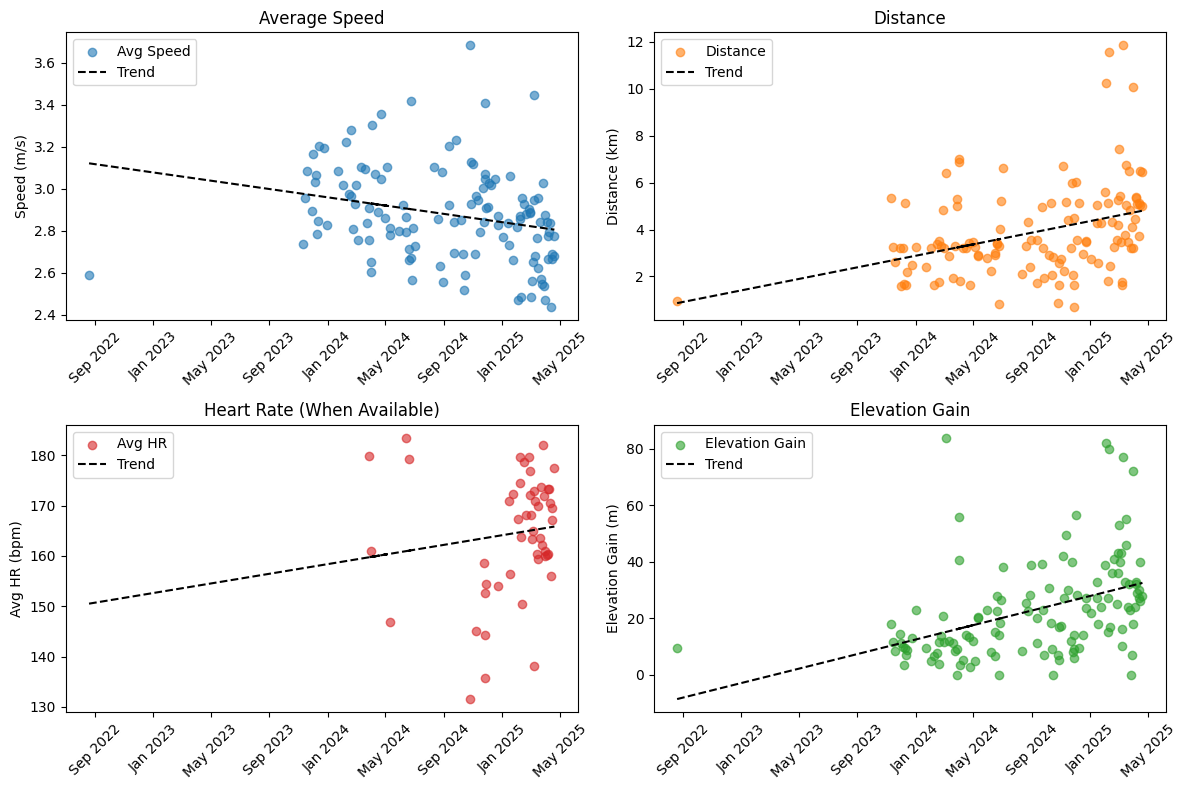

In [9]:
#these are activities done without any filtering
plot_func(df_runs)
# plot_improvement(df_runs)


# plt.savefig("ex_improvement_no_cat")

In [6]:
#this is for improvement with our method
#filenames come from our models, this is person A, boulder trail example included in the paper
filenames = ['11324217227.gpx', '10297798873.gpx', '10380623110.gpx', '10676173524.gpx', '10755668518.gpx', '10796100865.gpx', '10821874440.gpx', '10862944105.gpx', '10938133614.gpx', '11143843698.gpx', '11190344963.gpx', '11240578760.gpx', '11300365890.gpx', '11324217227.gpx']
files = ['activities/' + f for f in filenames]


df_filtered = df_runs[df_runs['Filename'].isin(files)]
df_filtered.head()

,Activity Date,Activity Type,Elapsed Time,Distance,Average Heart Rate,Max Heart Rate,Moving Time,Average Speed,Elevation Gain,Average Grade,Filename
7,"Nov 28, 2023, 9:50:45 PM",Run,1116,3.22,NaN,NaN,1116.0,2.893100,14.260119,-0.170347,activities/10297798873.gpx
13,"Dec 14, 2023, 7:20:59 PM",Run,813,2.20,NaN,NaN,688.0,3.202863,8.568334,-0.426580,activities/10380623110.gpx
17,"Feb 1, 2024, 6:48:56 PM",Run,1086,3.23,NaN,NaN,1072.0,3.018004,4.961785,-0.472908,activities/10676173524.gpx
19,"Feb 13, 2024, 6:49:59 PM",Run,1139,3.39,NaN,NaN,1139.0,2.977682,7.600000,-0.342023,activities/10755668518.gpx
21,"Feb 19, 2024, 8:20:53 PM",Run,1181,3.50,NaN,NaN,1181.0,2.966986,11.724444,-0.231164,activities/10796100865.gpx


C:\Users\Maxcu\AppData\Local\Temp\ipykernel_25480\3878608813.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_runs['Activity Date'] = pd.to_datetime(df_runs['Activity Date'])
C:\Users\Maxcu\AppData\Local\Temp\ipykernel_25480\3878608813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['Activity Date'] = pd.to_datetime(df_runs['Activity Date'])
C:\Users\Maxcu\AppData\Local\Temp\ipykernel_25480\3878608813.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

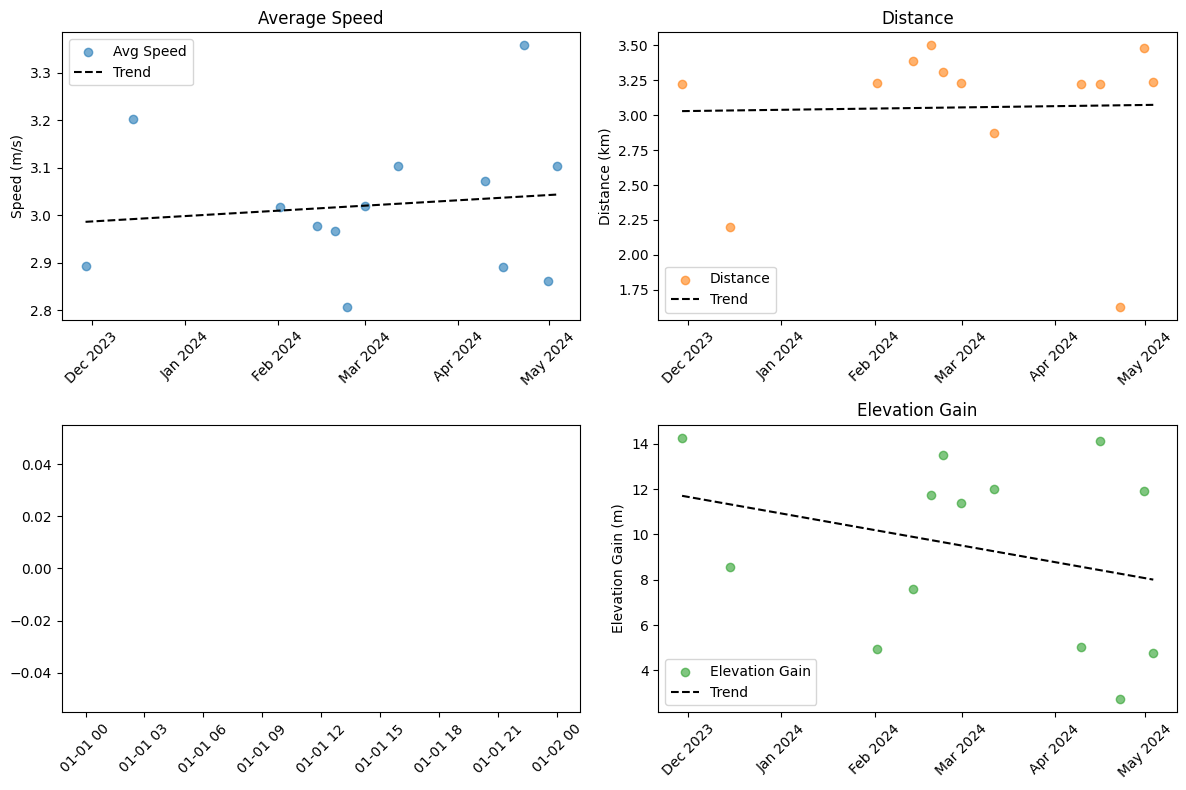

In [7]:
plot_func(df_filtered)

C:\Users\Maxcu\AppData\Local\Temp\ipykernel_25480\1908513442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['Activity Date'] = pd.to_datetime(df_runs['Activity Date'])
C:\Users\Maxcu\AppData\Local\Temp\ipykernel_25480\1908513442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_runs['Distance'] = pd.to_numeric(df_runs['Distance'], errors='coerce')
C:\Users\Maxcu\AppData\Local\Temp\ipykernel_25480\1908513442.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

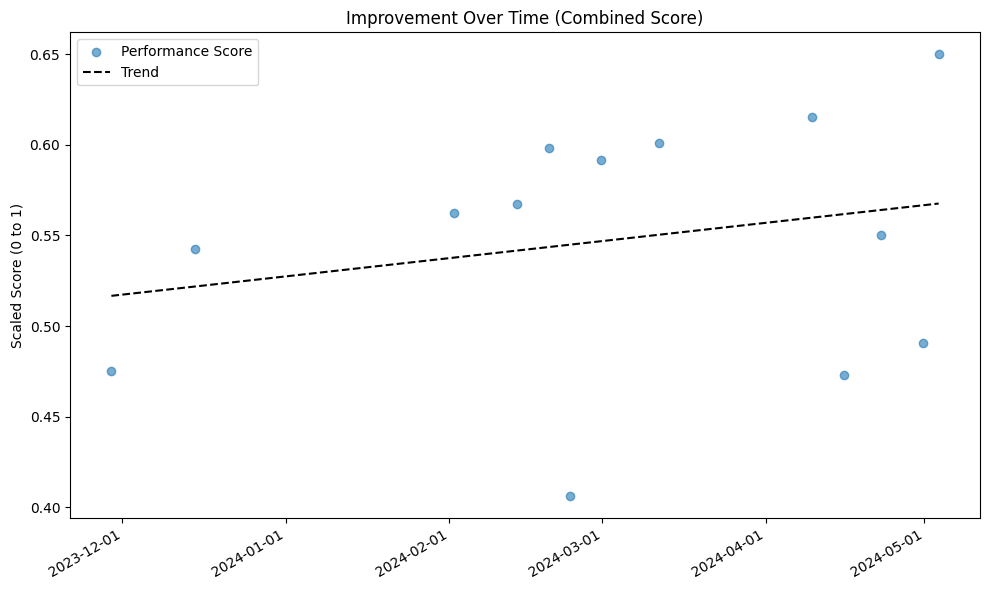

In [11]:

plot_improvement(df_filtered)